In [1]:
import pandas as pd
from matplotlib import pyplot

In [2]:
coke=pd.read_excel("CocaCola_Sales_Rawdata.xlsx",parse_dates=True)

In [3]:
coke

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


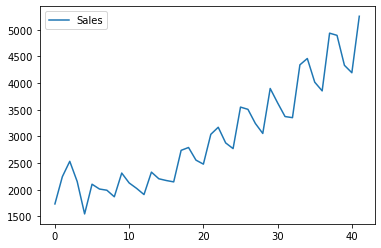

In [4]:
coke.plot()
pyplot.show()

## Histogram and density plots

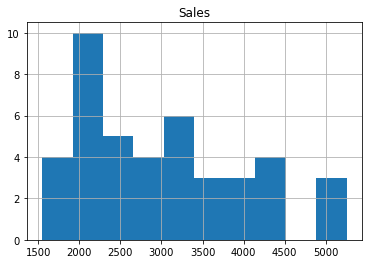

In [5]:
coke.hist()
pyplot.show()

In [6]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


## Data driven models

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

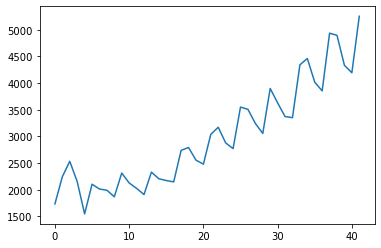

In [8]:
coke.Sales.plot()

## Splitting data

In [9]:
train=coke.head(27)
test=coke.tail(15)

## Moving average method

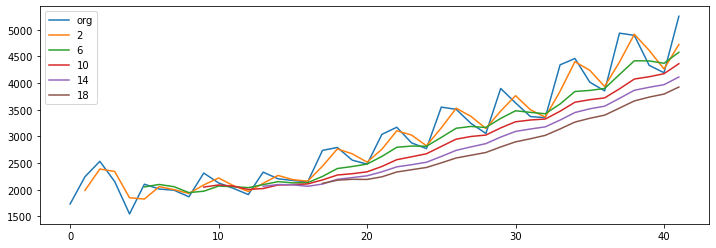

In [10]:
plt.figure(figsize=(12,4))
coke.Sales.plot(label='org')
for i in range(2,20,4):
    coke['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')    

## Time series decomposition

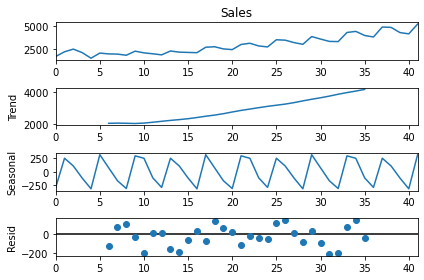

In [11]:
decompose_ts_add=seasonal_decompose(coke.Sales,period=12)
decompose_ts_add.plot()
plt.show()

## ACF and PACF plots

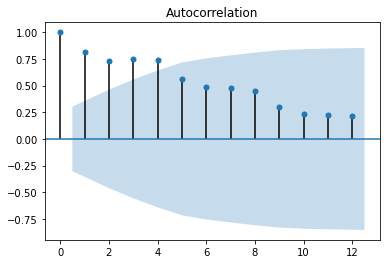

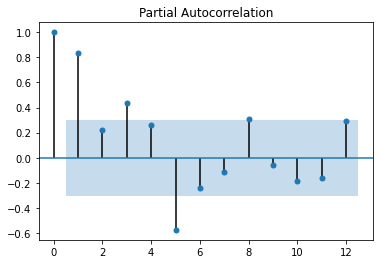

In [12]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coke.Sales,lags=12)
tsa_plots.plot_pacf(coke.Sales,lags=12)
plt.show()

## Evaluation metric MAPE

In [13]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple exponential method

In [14]:
ses_model=SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Sales)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


23.870427559229697

## Holt's method

In [15]:
hw_model=Holt(train['Sales']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw=hw_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw,test.Sales)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


13.23513796179124

## Holts winter exponential smoothing with additive seasonality and additive trend

In [16]:
hwe_model_add=ExponentialSmoothing(train['Sales'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_model_add=hwe_model_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwe_model_add,test.Sales)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


8.534310704633134

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [17]:
hwe_model_mul=ExponentialSmoothing(train['Sales'],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_model_mul=hwe_model_mul.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwe_model_mul,test.Sales)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


12.592660541213911

## Final model by combining train and test

In [18]:
hwe_model_add=ExponentialSmoothing(train['Sales'],seasonal="add",trend="add",seasonal_periods=12).fit()

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [19]:
hwe_model_add.forecast(40)

27    3418.153751
28    3115.463339
29    3611.227160
30    3567.269552
31    3409.797493
32    3355.853969
33    3892.822771
34    3878.396014
35    3632.492736
36    3546.768612
37    4147.324555
38    4127.063897
39    4028.991766
40    3726.301354
41    4222.065175
42    4178.107567
43    4020.635508
44    3966.691984
45    4503.660786
46    4489.234029
47    4243.330751
48    4157.606626
49    4758.162570
50    4737.901912
51    4639.829780
52    4337.139369
53    4832.903190
54    4788.945582
55    4631.473523
56    4577.529999
57    5114.498801
58    5100.072044
59    4854.168766
60    4768.444641
61    5369.000585
62    5348.739927
63    5250.667795
64    4947.977383
65    5443.741205
66    5399.783597
dtype: float64

## Model based approach

In [20]:
coke=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
Quarter=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
import numpy as np
p=coke['Quarter'][0]
coke['Quarter'][0]
for i in range(42):
      p = coke["Quarter"][i]
coke['Quarter'][i]
Quarter_dummies = pd.DataFrame(pd.get_dummies(coke['Quarter']))
coke1 = pd.concat([coke,Quarter_dummies],axis = 1)

coke1["t"]=np.arange(1,43)

coke1['t_squared']=coke1["t"]*coke1["t"]
coke1.columns
coke1["log_sales"]=np.log(coke1["Sales"])


In [21]:
coke1

,Quarter,Sales,Q1_86,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,...,Q4_89,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95,t,t_squared,log_sales
0,Q1_86,1734.827000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,Q3_86,2533.804993,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,Q4_86,2154.962997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,Q1_87,1547.818996,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,36,7.651791
6,Q3_87,2014.362999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,49,7.608058
7,Q4_87,1991.746998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,64,7.596767
8,Q1_88,1869.049999,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,100,7.746574


## Heat Map

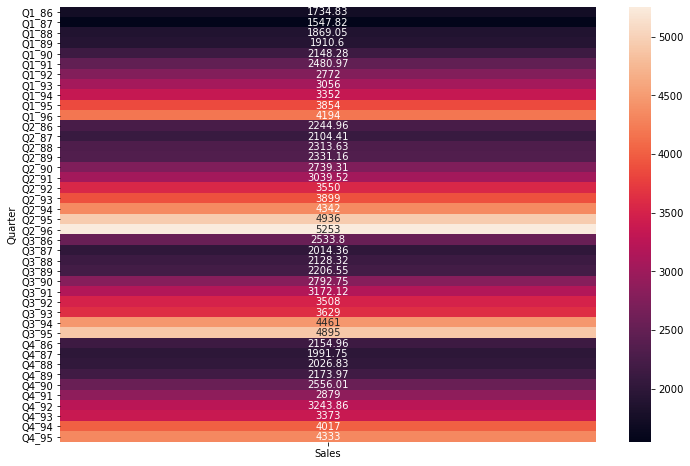

In [22]:
plt.figure(figsize=(12,8))
heatmap_y_month=pd.pivot_table(data=coke1,values='Sales',index='Quarter',aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

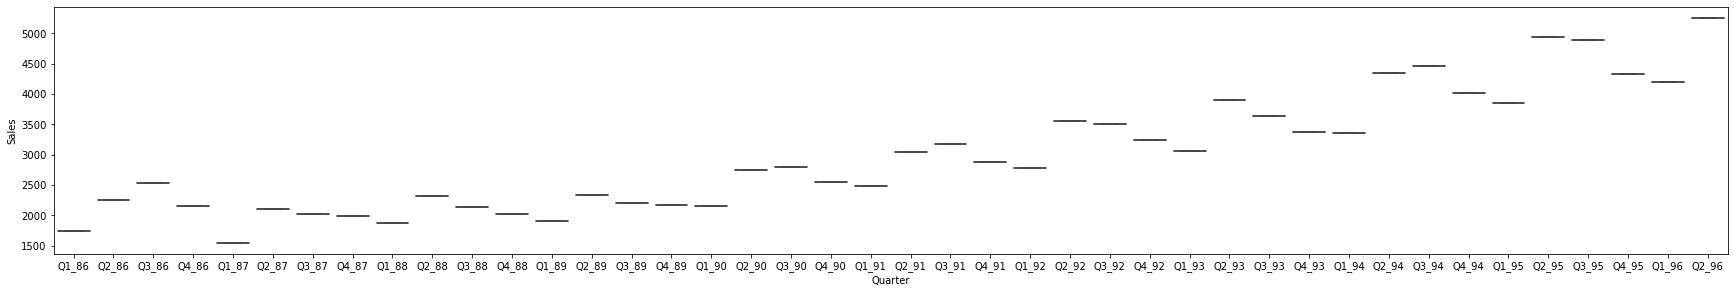

In [23]:
plt.figure(figsize=(30,10))  #Box plot
plt.subplot(2,1,1)
sns.boxplot(x="Quarter",y="Sales",data=coke1)

## Splitting data

In [24]:
train=coke1.head(27)
test=coke1.tail(15)

In [25]:
#Linear model

import statsmodels.formula.api as smf

linear_model=smf.ols('Sales~t',data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

743.8797302211141

In [26]:
#Exponential model

exp=smf.ols('log_sales~t',data=train).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_exp))**2))
rmse_exp

4097.76700129582

In [27]:
#Quadratic

quad=smf.ols('Sales~t+t_squared',data=train).fit()
pred_quad=pd.Series(quad.predict(test[['t','t_squared']]))
rmse_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_quad

983.9814363887269

In [28]:
#compare the results

data={"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_values":pd.Series([rmse_linear,rmse_exp,rmse_quad])}
table_RMSE=pd.DataFrame(data)
table_RMSE.sort_values(['RMSE_values'])

,MODEL,RMSE_values
0,rmse_linear,743.879730
2,rmse_quad,983.981436
1,rmse_exp,4097.767001


## Predicting for new time period

In [29]:
predict_data=pd.read_csv("Predict_new (2).csv")
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_squared
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [30]:
#building linear model for coke dataset

model_final=smf.ols('Sales~t',data=coke1).fit()

In [31]:
pred_new=pd.Series(linear_model.predict(predict_data))
pred_new

0      9918.100825
1      9969.562961
2     10021.025098
3     10072.487235
4     10123.949372
5     10175.411509
6     10226.873646
7     10278.335782
8     10329.797919
9     10381.260056
10    10432.722193
11    10484.184330
dtype: float64